# Simple Linear Regression

- Using only two variables one is the response (dependent) and the other is the explantory (independent)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\AHamdan\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# `A)` Creating Model

## `1- ` The explantory (independent) is Numerical

In [2]:
taiwan_real_estate = pd.read_csv('taiwan_real_estate2.csv')

In [3]:
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


|Column Name | Meaning |
| -----------| --------|
| dist_to_mrt_m |  Distance to nearest MRT metro station, in meters.|
| n_convenience | No. of convenience stores in walking distance. |
| house_age_years | The age of the house, in years, in 3 groups. |
| price_twd_msq | House price per unit area, in New Taiwan dollars per meter squared. |

In [4]:
taiwan_real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dist_to_mrt_m    414 non-null    float64
 1   n_convenience    414 non-null    int64  
 2   house_age_years  414 non-null    object 
 3   price_twd_msq    414 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 13.1+ KB


In [5]:
from statsmodels.formula.api import ols

In [6]:
# Create the model object
# in the formulla put the response variable first then the other paramter needed
mdl_price_vs_conv = ols('price_twd_msq ~ n_convenience', data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


In [7]:
mdl_price_vs_conv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Tue, 07 May 2024   Prob (F-statistic):           3.41e-37
Time:                        01:13:48   Log-Likelihood:                -1091.1
No. Observations:                 414   AIC:                             2186.
Df Residuals:                     412   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2242      0.285     28.857      0.000       7.664       8.784
n_convenience     0.7981      0.057     14.118      0.000       0.687       0.909
==============================================================================
Omnibus:                      171.927   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1417.242
Skew:                           1.553   Prob(JB):                    1.78e-308
Kurtosis:                      11.516   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## `2-`  the explantory (independent) is Categorical

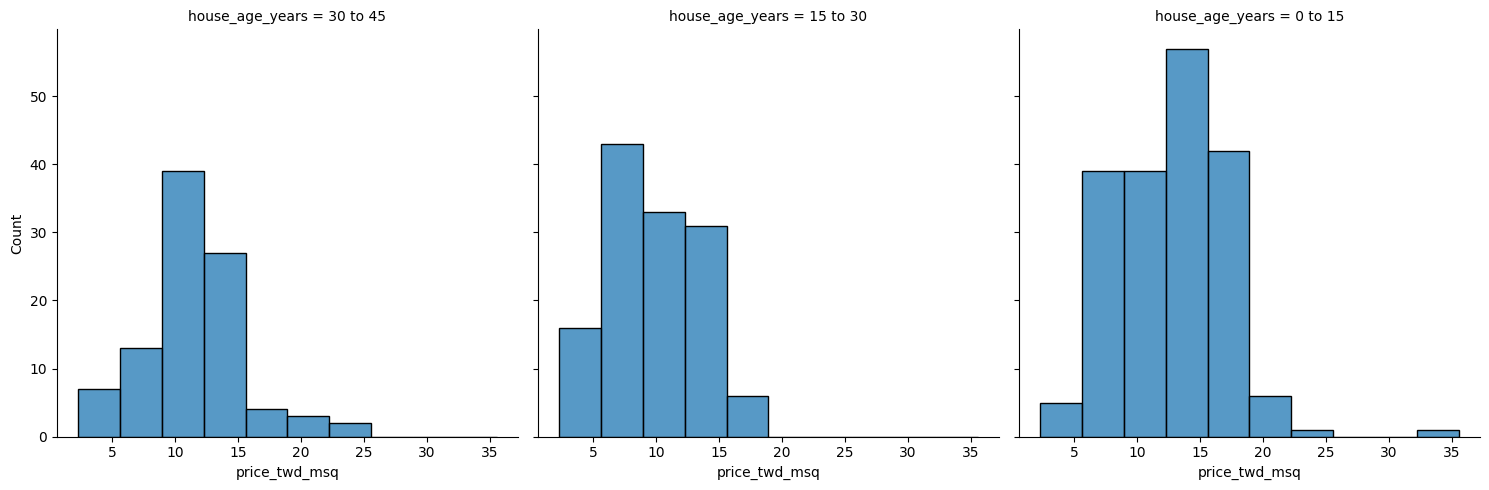

In [8]:
# Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.displot(data=taiwan_real_estate,
         x='price_twd_msq',
         col='house_age_years',
         bins=10);

# Show the plot
#plt.show()

In [9]:
# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = taiwan_real_estate.groupby('house_age_years')['price_twd_msq'].mean()

# Print the result
print(mean_price_by_age)


house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64

In [10]:
# Create the model, fit it
mdl_price_vs_age = ols("price_twd_msq ~ house_age_years", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


In [11]:
mdl_price_vs_age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          price_twd_msq   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     18.80
Date:                Tue, 07 May 2024   Prob (F-statistic):           1.54e-08
Time:                        01:13:50   Log-Likelihood:                -1154.7
No. Observations:                 414   AIC:                             2315.
Df Residuals:                     411   BIC:                             2327.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      12.6375      0.287     44.098      0.000      12.074      13.201
house_age_years[T.15 to 30]    -2.7607      0.451     -6.126      0.000      -3.647      -1.875
house_age_years[T.30 to 45]    -1.2442      0.496     -2.507      0.013      -2.220      -0.268
==============================================================================
Omnibus:                       42.433   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.322
Skew:                           0.528   Prob(JB):                     1.64e-22
Kurtosis:                       5.168   Cond. No.                         3.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Meaning:
- The model choose `house_age_years` : `0 to 15` as base line category
- As the intercept 12.63 equal to the mean of price_twd_msq for base line category
- While the other coefficent is relative to the intercept
    - `house_age_years` : `15 to 30`is less than base line category by -2.76
    - `house_age_years` : `30 to 45`is less than base line category by -1.24

In [12]:
# Update the model formula to remove the intercept
mdl_price_vs_age0 = ols("price_twd_msq ~ house_age_years + 0", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age0.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


#### Meaning:
- By changing the formula with adding + 0, all coefficients should be given relative to Zero
- Simply we fitting regression without intercept term
- The result will be the mean of each category

In [13]:
mdl_price_vs_age0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          price_twd_msq   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     18.80
Date:                Tue, 07 May 2024   Prob (F-statistic):           1.54e-08
Time:                        01:13:50   Log-Likelihood:                -1154.7
No. Observations:                 414   AIC:                             2315.
Df Residuals:                     411   BIC:                             2327.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
house_age_years[0 to 15]     12.6375      0.287     44.098      0.000      12.074      13.201
house_age_years[15 to 30]     9.8767      0.348     28.398      0.000       9.193      10.560
house_age_years[30 to 45]    11.3933      0.405     28.112      0.000      10.597      12.190
==============================================================================
Omnibus:                       42.433   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.322
Skew:                           0.528   Prob(JB):                     1.64e-22
Kurtosis:                       5.168   Cond. No.                         1.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# `B)` Making Prediction

- If I set the Explanatory Variable to a certian value
    - What value would the response variable have?

In [14]:
taiwan_real_estate.n_convenience.unique()

array([10,  9,  5,  3,  7,  6,  1,  4,  2,  8,  0], dtype=int64)

In [15]:
# Create the explanatory_data, column name must be matched with column name during model prediction
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0,11)})
explanatory_data

,n_convenience
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [16]:
print(mdl_price_vs_conv.params)


Intercept        8.224237
n_convenience    0.798080
dtype: float64


In [17]:
# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)
price_twd_msq

0      8.224237
1      9.022317
2      9.820397
3     10.618477
4     11.416556
5     12.214636
6     13.012716
7     13.810795
8     14.608875
9     15.406955
10    16.205035
dtype: float64

In [18]:
# Create prediction_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_conv.predict(explanatory_data))
prediction_data

,n_convenience,price_twd_msq
0,0,8.224237
1,1,9.022317
2,2,9.820397
3,3,10.618477
4,4,11.416556
5,5,12.214636
6,6,13.012716
7,7,13.810795
8,8,14.608875
9,9,15.406955


### Visualizing predictions

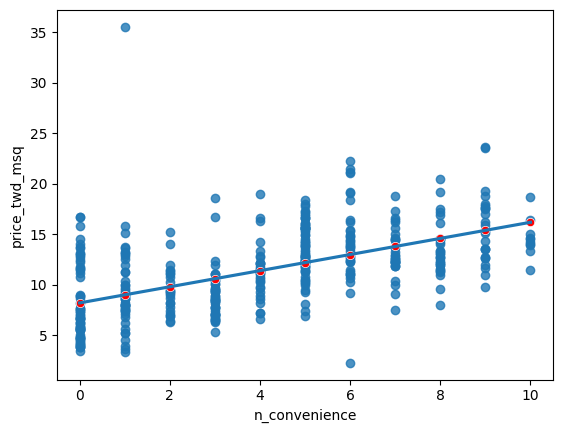

In [19]:
# Create a new figure, fig
fig = plt.figure()

sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=taiwan_real_estate,
            ci=None)
# Add a scatter plot layer to the regplot
sns.scatterplot(x="n_convenience",
            y="price_twd_msq",
            data=prediction_data,
            color= 'red')

# Show the layered plot
plt.show()

### The limits of prediction

In [20]:
impossible = pd.DataFrame({'n_convenience': [-1, 2.5]})

In [21]:
mdl_price_vs_conv.predict(impossible)

0     7.426158
1    10.219437
dtype: float64

- The model give you prediction for vaules not exist in real life

##  `C` Working with model objects

#### 1-Params

In [22]:
#paramters to get coefficents (intercept and slope)
mdl_price_vs_conv.params

Intercept        8.224237
n_convenience    0.798080
dtype: float64

#### 2-Fitted values

In [23]:
#gives prediction on the original data set
mdl_price_vs_conv.fittedvalues

0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Length: 414, dtype: float64

In [24]:
#it give you y^ for your expalnatory data
mdl_price_vs_conv.predict(taiwan_real_estate['n_convenience'])

0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Length: 414, dtype: float64

#### 3-Residuals

In [25]:
# actual response value - predicted response value
# y - y^
mdl_price_vs_conv.resid

0     -4.737561
1     -2.638422
2      2.097013
3      4.366302
4      0.826211
         ...   
409   -3.564631
410   -0.278362
411   -1.526378
412    3.670387
413    3.927387
Length: 414, dtype: float64

In [26]:
# y - y^
taiwan_real_estate['price_twd_msq'] - mdl_price_vs_conv.fittedvalues

0     -4.737561
1     -2.638422
2      2.097013
3      4.366302
4      0.826211
         ...   
409   -3.564631
410   -0.278362
411   -1.526378
412    3.670387
413    3.927387
Length: 414, dtype: float64

#### 4- R-Squared

In [27]:
mdl_price_vs_conv.rsquared

0.32604660851305034

 A score of one means you have a perfect fit, and a score of zero means your model is no better than randomness. What constitutes a good score depends on your dataset. A score of zero-point five on a psychological experiment may be exceptionally high because humans are inherently hard to predict, but in other cases, a score of zero-point nine may be considered a poor fit. 
 
 It's just correlation squared

For simple linear regression, the interpretation of the coefficient of determination is straightforward. It is simply the correlation between the explanatory and response variables, squared. 

#### 5- Residual standard error (RSE)

The summary method unfortunately doesn't contain the RSE. However, it can indirectly be retrieved from the mse_resid attribute.

$RSE = MSE^2$

In [28]:
mdl_price_vs_conv.mse_resid

11.45069475710119

In [29]:
res = np.sqrt(mdl_price_vs_conv.mse_resid)
res

3.383887521343047

Is the difference between a predicted value and an observed value. The RSE is, very roughly speaking, a measure of the typical size of the residuals. That is, how much the predictions are typically wrong. 

A related, but less commonly used metric is the mean squared error, or MSE. As the name suggests, MSE is the squared residual standard error.

### `D)` Regression to the mean

Regression to the mean is a property of the data, not a type of model, but linear regression can be used to quantify its effect. 
-  Extreme responses are often due to randomness or luck. That means that extremes don't persist over time, because eventually the luck runs out. This is the concept of regression to the mean. Eventually, extreme cases will look more like average cases. 

#### Pearson's father son dataset
Add a line at y equals x.(green)

plt.axline(xy1=(0,0), slope=1, linewidth=2, color="green")

Add a line of linear regression predictions.(blue)


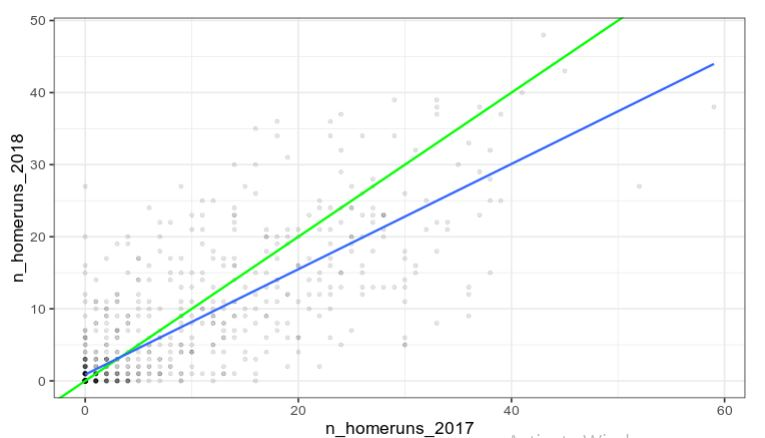

Here you can see a dataset of baseball batting data in 2017 and 2018. Each point represents a player, and more home runs are better. A naive prediction might be that the performance in 2018 is the same as the performance in 2017. That is, a linear regression would lie on the "y equals x" line.

Explore the plot and make predictions. What does regression to the mean say about the number of home runs in 2018 for a player who was very successful in 2017?

#### Someone who hit 40 home runs in 2017 is predicted to hit 10 fewer home runs the next year because regression to the mean states that, on average, extremely high values are not sustained.

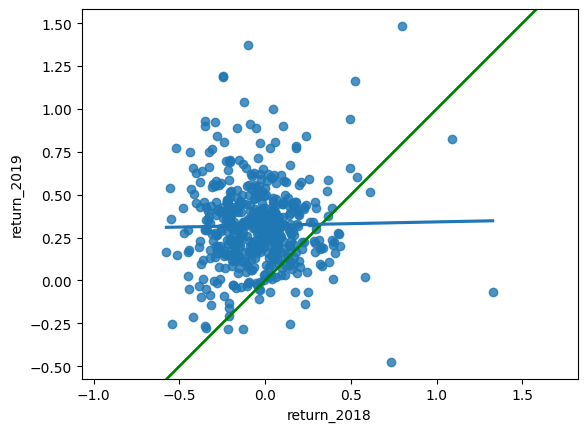

In [30]:
# Create a new figure, fig

sp500_yearly_returns = pd.read_csv('sp500_yearly_returns.csv')

fig = plt.figure()

# Plot the first layer: y = x
plt.axline(xy1=(0,0), slope=1, linewidth=2, color="green")

# Add scatter plot with linear regression trend line
sns.regplot(x= 'return_2018', y='return_2019', data= sp500_yearly_returns, ci= None)

# Set the axes so that the distances along the x and y axes look the same
plt.axis('equal')

# Show the plot
plt.show()

The regression trend line looks very different to the y equals x line. As the financial advisors say, `Past performance is no guarantee of future results.`

## `E` Transforming variables (High Order Terms)

Sometimes, the relationship between the explanatory variable and the response variable may not be a straight line. To fit a linear regression model, you may need to transform the explanatory variable or the response variable, or both of them. 

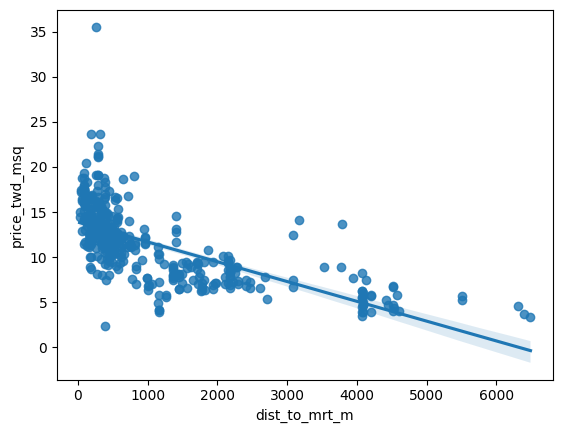

In [31]:
plt.figure()

# Plot using the transformed variable
sns.regplot(x = 'dist_to_mrt_m', y = 'price_twd_msq', data = taiwan_real_estate)
plt.show()

- The relation is not linear, so we will transform `dist_to_mrt_m` by taking is square root

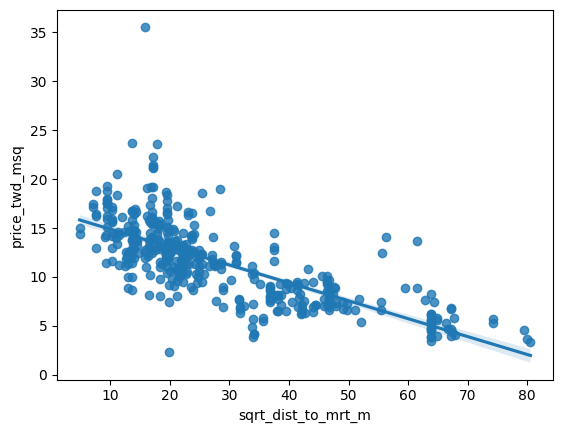

In [32]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

plt.figure()

# Plot using the transformed variable
sns.regplot(x = 'sqrt_dist_to_mrt_m', y = 'price_twd_msq', data = taiwan_real_estate)
plt.show()

In [33]:
# Run a linear regression of price_twd_msq vs. sqrt_dist_to_mrt_m
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()
mdl_price_vs_dist.params


Intercept             16.709799
sqrt_dist_to_mrt_m    -0.182843
dtype: float64

In [34]:
# Use this explanatory data
explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})

# Use mdl_price_vs_dist to predict explanatory_data, it will apply the model on the first column on dataframe
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)

prediction_data

,sqrt_dist_to_mrt_m,dist_to_mrt_m,price_twd_msq
0,0.0,0,16.709799
1,10.0,100,14.881370
2,20.0,400,13.052942
3,30.0,900,11.224513
4,40.0,1600,9.396085
5,50.0,2500,7.567656
6,60.0,3600,5.739227
7,70.0,4900,3.910799
8,80.0,6400,2.082370


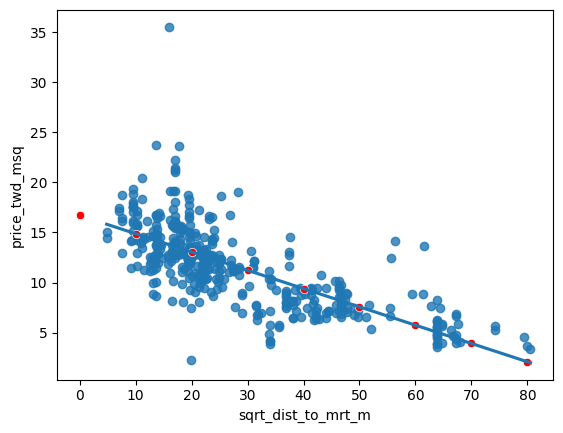

In [35]:
fig = plt.figure()
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x= 'sqrt_dist_to_mrt_m', y = 'price_twd_msq', data = prediction_data , color='red')
plt.show()

You transform like a robot in disguise! By transforming the explanatory variable, the relationship with the response variable became linear, and so a linear regression became an appropriate model.

## Example of transforming both response and explanotry data

In [36]:
ad_conversion = pd.read_csv('ad_conversion.csv')
ad_conversion.head()

,spent_usd,n_impressions,n_clicks
0,1.43,7350,1
1,1.82,17861,2
2,1.25,4259,1
3,1.29,4133,1
4,4.77,15615,3


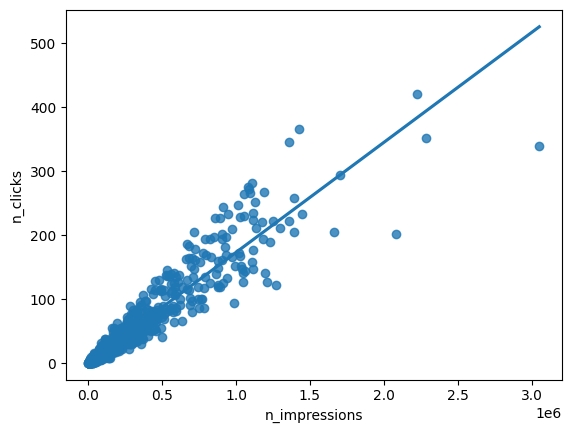

In [37]:
sns.regplot(x= 'n_impressions', y = 'n_clicks', data = ad_conversion, ci = None);

In [38]:
# lets do transformation

In [39]:
ad_conversion['qurt_impressions'] = ad_conversion['n_impressions'] ** 0.25
ad_conversion['qurt_click'] = ad_conversion['n_clicks'] ** 0.25

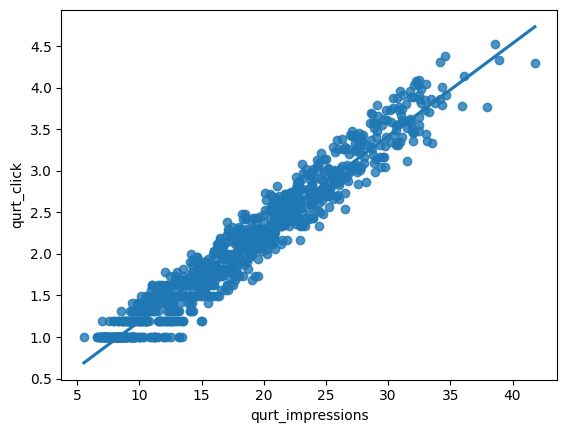

In [40]:
sns.regplot(x= 'qurt_impressions', y = 'qurt_click', data = ad_conversion, ci = None);

In [41]:
#create a model 
mdl_click_vs_impression = ols("qurt_click ~ qurt_impressions", data = ad_conversion).fit()
mdl_click_vs_impression.params

Intercept           0.071748
qurt_impressions    0.111533
dtype: float64

In [42]:
#creat explantory data
explanatory_data = pd.DataFrame({'qurt_impressions': np.arange(0, 3e6+1, 5e5)** 0.25,
                                'impression': np.arange(0, 3e6+1, 5e5) })
explanatory_data

,qurt_impressions,impression
0,0.000000,0.0
1,26.591479,500000.0
2,31.622777,1000000.0
3,34.996355,1500000.0
4,37.606031,2000000.0
5,39.763536,2500000.0
6,41.617915,3000000.0


In [43]:
#get predicted variables
predicted_data = explanatory_data.assign(
                    qurt_clicks = mdl_click_vs_impression.predict(explanatory_data)
)
predicted_data

,qurt_impressions,impression,qurt_clicks
0,0.000000,0.0,0.071748
1,26.591479,500000.0,3.037576
2,31.622777,1000000.0,3.598732
3,34.996355,1500000.0,3.974998
4,37.606031,2000000.0,4.266063
5,39.763536,2500000.0,4.506696
6,41.617915,3000000.0,4.713520


In [44]:
# back tranformation
predicted_data['clicks'] = predicted_data['qurt_clicks'] ** 4
predicted_data

,qurt_impressions,impression,qurt_clicks,clicks
0,0.000000,0.0,0.071748,0.000026
1,26.591479,500000.0,3.037576,85.135121
2,31.622777,1000000.0,3.598732,167.725102
3,34.996355,1500000.0,3.974998,249.659131
4,37.606031,2000000.0,4.266063,331.214159
5,39.763536,2500000.0,4.506696,412.508546
6,41.617915,3000000.0,4.713520,493.607180


#### `F)` Assest Your Model

Lets make comparsion betwwen tansformed model and original data model

In [45]:
mdl_click_vs_impression_org = ols("n_clicks ~ n_impressions", data = ad_conversion).fit()

In [46]:
#check the differenc of R-Squared
print('Orginal Model R-Squared:', mdl_click_vs_impression_org.rsquared)
print('Transformed Model R-Squared:', mdl_click_vs_impression.rsquared)

Orginal Model R-Squared: 0.8916134973508041
Transformed Model R-Squared: 0.9445272817143905


In [47]:
#check the differenc of RSE
print('Orginal Model RSE:', np.sqrt(mdl_click_vs_impression_org.mse_resid))
print('Transformed Model RSE:', np.sqrt(mdl_click_vs_impression.mse_resid))

Orginal Model RSE: 19.905838862478134
Transformed Model RSE: 0.19690640896875722


### `G)` Visualize Model Fit

#### 1- Residuals vs. fitted

If a linear regression model is a good fit, then the residuals are approximately normally distributed, with mean zero. 

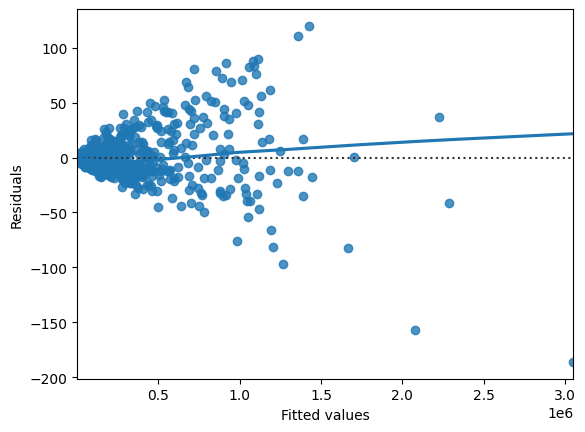

In [48]:
# Plot the residuals vs. fitted values for original data
sns.residplot (x='n_impressions', y='n_clicks', data=ad_conversion, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

# Show the plot
plt.show()

In [49]:
ad_conversion.head()

,spent_usd,n_impressions,n_clicks,qurt_impressions,qurt_click
0,1.43,7350,1,9.259165,1.000000
1,1.82,17861,2,11.560495,1.189207
2,1.25,4259,1,8.078429,1.000000
3,1.29,4133,1,8.018006,1.000000
4,4.77,15615,3,11.178551,1.316074


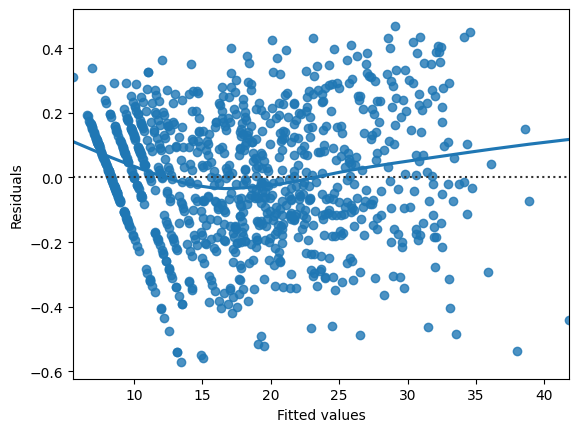

In [53]:
# Plot the residuals vs. fitted values for transformed data
sns.residplot (x='qurt_impressions', y='qurt_click', data=ad_conversion, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

# Show the plot
plt.show()

#### 2- Q-Q plot

 It shows whether or not the residuals follow a normal distribution.

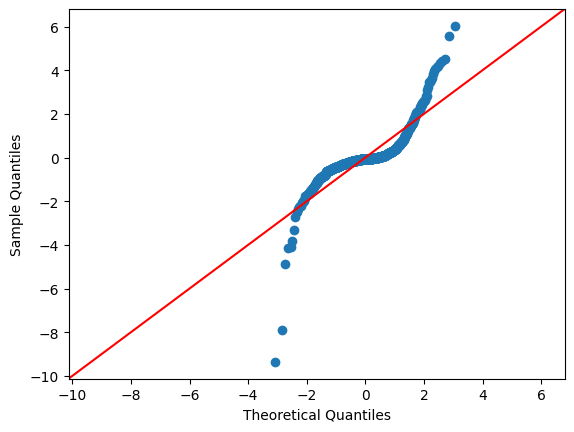

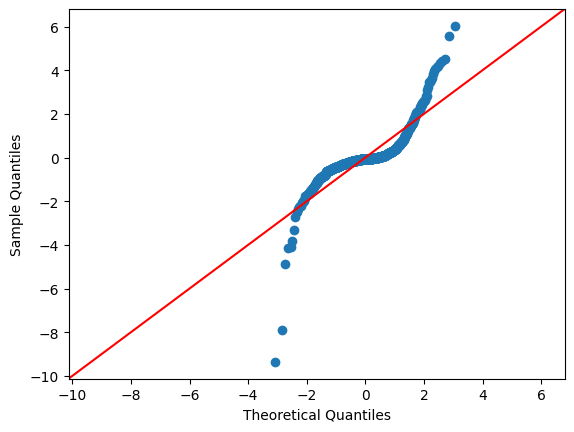

In [54]:
from statsmodels.api import qqplot
qqplot(data = mdl_click_vs_impression_org.resid, fit = True, line = '45' )

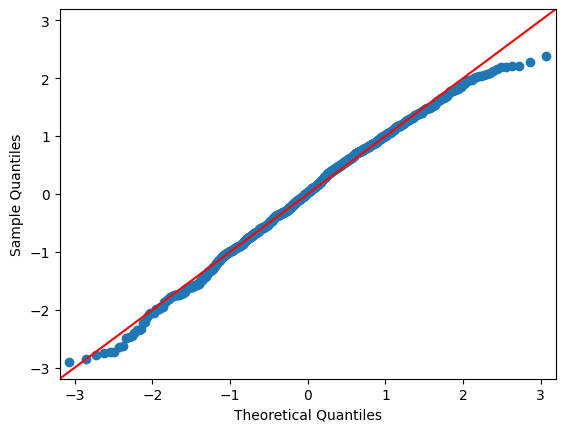

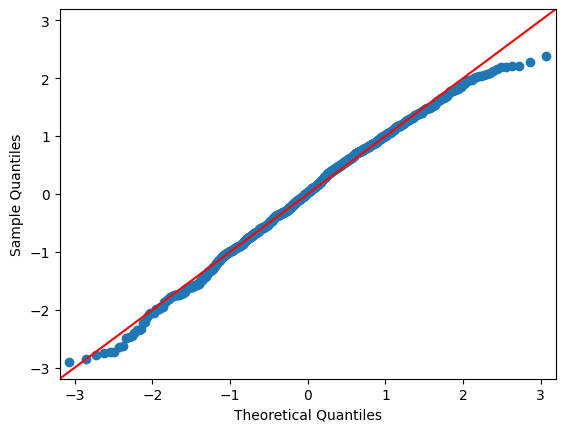

In [55]:
from statsmodels.api import qqplot
qqplot(data = mdl_click_vs_impression.resid, fit = True, line = '45' )

#### `H)` Outliers, leverage, and influence

Sometimes, datasets contain unusual values. We'll look at how to spot them and the consequences they have for your regression models. 

**Outliers**

`1 -` The first kind of outlier is when you have explanatory variables that are extreme. In the simple linear regression case, it's easy to find and visualize them. 

`2 -` The other property of outliers is when the point lies a long way from the model predictions

**leverage, and influence**

Leverage quantifies how extreme your explanatory variable values are. That is, it measures the first type of outlier we discussed. With one explanatory variable, you can find the values by filtering, but with many explanatory variables, the mathematics is more complicated

A related concept to leverage is **influence**. This is a type of "leave one out" metric. That is, it measures how much the model would change if you reran it without that data point. I like to think of it as the torque of the point. 

Leverage and influence, along with other metrics, are retrieved from the summary frame.

You get them by calling the get_influence() method on the fitted model, then calling the summary_frame() method. 

In [56]:
summary = mdl_click_vs_impression.get_influence().summary_frame()
summary

,dfb_Intercept,dfb_qurt_impressions,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.025941,0.020961,3.709625e-04,-0.531155,0.002623,-0.027238,-0.530951,-0.027228
1,-0.034293,0.025444,7.325553e-04,-0.873931,0.001915,-0.038277,-0.873821,-0.038272
2,0.007449,-0.006204,2.955100e-05,0.138555,0.003069,0.007688,0.138482,0.007684
3,0.009336,-0.007786,4.634846e-05,0.172835,0.003094,0.009628,0.172745,0.009623
4,-0.000509,0.000384,1.569864e-07,-0.012463,0.002017,-0.000560,-0.012456,-0.000560
...,...,...,...,...,...,...,...,...
931,-0.068374,0.092343,5.322341e-03,1.406998,0.005348,0.103173,1.407737,0.103227
932,-0.013349,0.020197,3.076374e-04,0.439471,0.003176,0.024805,0.439281,0.024794
933,0.000738,0.001083,1.144507e-05,0.142486,0.001126,0.004784,0.142412,0.004782
934,-0.002159,0.003100,6.648284e-06,0.058523,0.003867,0.003646,0.058492,0.003645


In [57]:
#For historical reasons, leverage is described in the so-called hat matrix. 
ad_conversion['leverage'] = summary['hat_diag']

In [58]:
ad_conversion.head()

,spent_usd,n_impressions,n_clicks,qurt_impressions,qurt_click,leverage
0,1.43,7350,1,9.259165,1.000000,0.002623
1,1.82,17861,2,11.560495,1.189207,0.001915
2,1.25,4259,1,8.078429,1.000000,0.003069
3,1.29,4133,1,8.018006,1.000000,0.003094
4,4.77,15615,3,11.178551,1.316074,0.002017


Recall that influence is based on the size of the residuals and the leverage. It isn't a straightforward multiplication; instead, we use a metric called Cook's distance. It is stored in the summary frame as 'cooks_d'.

We can find the most influential roaches by arranging the rows by descending Cook's distance values. 

In [64]:
ad_conversion['influence'] = summary['cooks_d']
ad_conversion.sort_values('influence', ascending = False)

,spent_usd,n_impressions,n_clicks,qurt_impressions,qurt_click,leverage,influence
332,360.150001,2080666,202,37.979618,3.769970,0.009092,3.453160e-02
329,639.949998,3052003,340,41.797109,4.294076,0.012458,3.180957e-02
328,236.769999,1267550,123,33.553766,3.330246,0.005926,1.810460e-02
819,541.700002,1428421,367,34.571168,4.376899,0.006584,1.736889e-02
788,465.079998,1358324,346,34.139004,4.312896,0.006299,1.546104e-02
...,...,...,...,...,...,...,...
238,5.910000,20941,4,12.029549,1.414214,0.001796,1.391351e-08
11,4.630000,21026,4,12.041738,1.414214,0.001794,7.966982e-09
203,2.650000,10090,2,10.022424,1.189207,0.002364,4.242917e-09
537,19.110000,77794,14,16.700771,1.934336,0.001104,1.402531e-10


To see how influence works, let's remove the most influential if exist

In [77]:
#modified ad_conversion without most infulaence value
ad_conversion_mod = ad_conversion[ad_conversion['influence'] < 3.18e-2]
ad_conversion_mod.sort_values('influence', ascending = False)

,spent_usd,n_impressions,n_clicks,qurt_impressions,qurt_click,leverage,influence
328,236.769999,1267550,123,33.553766,3.330246,0.005926,1.810460e-02
819,541.700002,1428421,367,34.571168,4.376899,0.006584,1.736889e-02
788,465.079998,1358324,346,34.139004,4.312896,0.006299,1.546104e-02
335,163.899997,984521,95,31.499688,3.121986,0.004725,1.318708e-02
428,236.119999,1206533,128,33.142465,3.363586,0.005672,1.211277e-02
...,...,...,...,...,...,...,...
238,5.910000,20941,4,12.029549,1.414214,0.001796,1.391351e-08
11,4.630000,21026,4,12.041738,1.414214,0.001794,7.966982e-09
203,2.650000,10090,2,10.022424,1.189207,0.002364,4.242917e-09
537,19.110000,77794,14,16.700771,1.934336,0.001104,1.402531e-10


<Axes: xlabel='n_impressions', ylabel='n_clicks'>

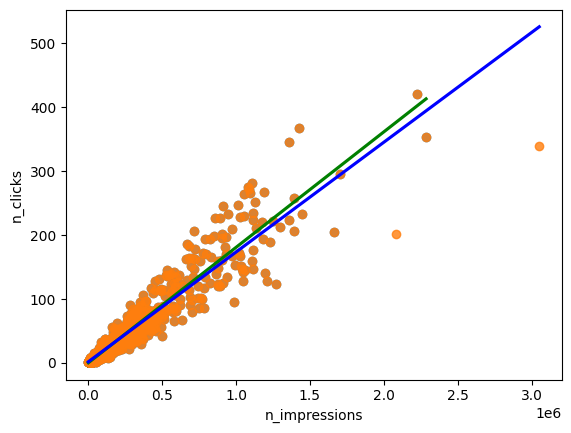

In [80]:
sns.regplot(x = 'n_impressions', y = 'n_clicks', data = ad_conversion_mod, ci = None, line_kws = {'color' : 'green'})
sns.regplot(x = 'n_impressions', y = 'n_clicks', data = ad_conversion, ci = None, line_kws = {'color' : 'blue'});